# Protocolo Básico para a Aplicação das Técnicas de Machine Learning em Economia

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

* Protocolo básico para a aplicação de técnicas de Machine Learning em Economia

### Referências

* Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media, 2019.
* Athey, S., & Imbens, G. (2017). "The State of Applied Econometrics: Causality and Policy Evaluation." *Journal of Economic Perspectives*.
* Mullainathan, S., & Spiess, J. (2017). "Machine Learning: An Applied Econometric Approach." *Journal of Economic Perspectives*.
* Varian, H. R. (2014). "Big Data: New Tricks for Econometrics." *Journal of Economic Perspectives*.

## Protocolo básico para a aplicação de técnicas de Machine Learning em Economia

Supondo que já temos nossa base de dados (dataframe) pronta para ser utilizada, isto é, todas as variáveis estão no formato adequado e não há valores faltantes, temos em mente as relações entre as variáveis e o problema que queremos resolver, podemos seguir o protocolo básico para a aplicação de técnicas de Machine Learning em Economia.

* **1. Dividir a base de dados em treino e teste**
* **2. Selecionar o modelo**
* **3. Treinar o modelo**
* **4. Avaliar o modelo**
* **5. Ajustar o modelo**
* **6. Fazer previsões**
 
### 1. Dividir a base de dados em treino e teste

**Por que dividir a base de dados em treino e teste?**

A **divisão da base de dados** é uma etapa essencial para garantir que o modelo tenha um desempenho confiável e generalizável. Existem diferentes formas de realizar essa divisão, dependendo do contexto e do objetivo do estudo:

* **Divisão Simples (Hold-Out)**
  * Descrição: A base de dados é dividida em duas partes: treino e teste. Geralmente, usa-se uma proporção de 70-80% para treino e 20-30% para teste.
    * Vantages: É simples e rápido de implementar.
    * Desvantagens: Pode gerar resultados instáveis, dependendo da aleatoriedade da divisão.
* **Validação Cruzada (Cross-Validation)**
  * Descrição: Divide a base em múltiplos "folds". O modelo é treinado em $k-1$ folds e testado no fold restante, repetindo o processo $k$ vezes.
    * Vantages: Fornece uma estimativa mais estável do desempenho do modelo.
    * Desvantagens: Pode ser computacionalmente mais custoso.
* **Validação Cruzada Leave-One-Out**
  * Descrição: Cada observação é usada como conjunto de teste uma vez, enquanto as demais são usadas para treino.
    * Vantages: Fornece uma estimativa mais precisa do desempenho do modelo.
    * Desvantagens: Pode ser computacionalmente custoso para bases de dados grandes.

A divisão simples (hold-out) é mais comum na prática profissional, devido à sua simplicidade e rapidez de implementação.

Já na prática acadêmica, recomenda-se a utilização da **validação cruzada**, em especial a validação cruzada com **10 folds**, para avaliar o desempenho do modelo. Porque a validação cruzada com 10 folds oferece um bom **equilíbrio entre viés (erros sistemáticos) e variância (sensibilidade a diferentes divisões dos dados)**, é eficiente computacionalmente e é adotada na literatura. Além disso, com 10 folds, a base é dividida em partes suficientes para garantir uma avaliação confiável, mas sem aumentar excessivamente o custo computacional, como acontece com Leave-One-Out. Obsevação, com bases grandes, 5 folds podem ser suficientes. Já com bases pequenas, pode-se utilizar 20 folds.


### 2. Selecionar o modelo

**Por que é importante escolher o modelo adequado?**

A escolha do modelo é uma etapa crucial no protocolo de Machine Learning, pois influencia diretamente a capacidade do modelo de capturar as relações entre as variáveis e resolver o problema proposto. Em Economia, a escolha deve considerar tanto o tipo de problema quanto a necessidade de interpretabilidade, recursos computacionais disponíveis e a robustez dos resultados.

**Como selecionar o modelo?** 

A escolha do modelo pode ser guiada por diversos fatores:

* **Tipo de Problema**
  * **Regressão**: Prever um valor contínuo.
    * Regressão Linear
    * Árvores de Decisão e Random Forest
    * Gradient Boosting (XGBoost, LightGBM)
    * Redes Neurais para dados complexos
  * **Classificação**: Prever uma classe ou categoria.
    * Regressão Logística
    * Support Vector Machines (SVM)
    * Árvores de Decisão e Random Forest e Gradient Boosting
    * Redes Neurais para classificações complexas
  * **Agrupamento (Clustering)**: Identificar padrões e grupos nos dados. Identificação de grupos em dados não rotulados (e.g., segmentação de consumidores).
    * K-Means
    * DBSCAN
    * Hierarchical Clustering

* **Interpretabilidade**
  * Modelos simples e interpretáveis:
    * Regressão Linear e Logística.
    * Árvores de Decisão.
  * Modelos complexos e menos interpretáveis:
    * Random Forest, Gradient Boosting.
    * Redes Neurais.

No dia a dia, a maior parte dos problemas são de **regressão** ou **classificação**. Grosso modo, a **Regressão** é utilizada quando queremos prever um valor contínuo de Y (e.g., preço de um imóvel), enquanto a **Classificação** é utilizada quando queremos prever uma classe ou categoria de Y (e.g., aprovação de crédito). 

### 3. Treinar o modelo

**O que significa treinar um modelo?**

Treinar um modelo significa ajustar seus parâmetros internos com base nos dados de treino, a fim de minimizar uma função de erro ou maximizar o desempenho em relação ao objetivo específico (e.g., minimizar o erro quadrático médio em um problema de regressão). Durante o treinamento, o modelo "aprende" padrões e relações entre as variáveis preditoras ($X$) e a variável dependente ($y$).

Etapas no treinamento do modelo
* Preparar os dados para o treinamento
* Selecionar o modelo que será treinado com os dados
* Ajustar o modelo aos dados de treino

#### 4. Avaliar o modelo

**Por que avaliar o modelo?**

A avaliação do modelo é uma etapa essencial para verificar sua capacidade de generalização, ou seja, o desempenho em dados que não foram usados no treinamento. O objetivo é identificar se o modelo está apto a capturar padrões relevantes ou se está apresentando problemas como overfitting (ajuste excessivo) ou underfitting (subajuste).

**Quais as métricas de avaliação?**

A escolha da métrica depende do tipo de problema:

* **Problemas de Regressão:**

  * Erro Médio Absoluto (MAE): Mede o erro absoluto médio entre as previsões e os valores reais.

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

  * Erro Quadrático Médio (MSE): Mede o erro quadrático médio entre as previsões e os valores reais.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

  * Raiz do Erro Quadrático Médio (RMSE): Mede a raiz quadrada do erro quadrático médio.

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

  * R quadrado ($R^2$): Mede a proporção da variabilidade da variável dependente que é explicada pelo modelo.

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


* **Problemas de classificação:**

  * Acurácia: Proporção de previsões corretas.

$$ Acurácia = \frac{Nº de previsões corretas}{Total de amostras} $$

  * Precisão, Recall e F1-Score:
    * Precisão: Proporção de verdadeiros positivos entre os previstos como positivos.
    * Recall: Proporção de verdadeiros positivos entre todos os positivos reais.
    * F1-Score: Média harmônica entre precisão e recall.
   * Curva ROC e AUC: Mede a capacidade do modelo de distinguir entre classes.

Sendo assim, vamos fazer o procedimento de validação cruzada com 10 folds para selecionar o modelo que melhor se ajusta aos nossos dados.



Vamos aplicar um exemplo de previsão para dados do Banco Central do Brasil.

Antes, você deve instalar a biblioteca de python para o BaCen. Ela serve para baixar os dados diretamente do site do Banco Central do Brasil. Vá ao terminal e digite: `pip install python-bcb`


In [48]:
from bcb import sgs
import pandas as pd

Vamos baixar a série histórica do IPCA (Índice de Preços ao Consumidor Amplo) de 1995 a 2024.

In [49]:
# Código do IPCA é 433
df = sgs.get(433, start='1995-01-01', end='2024-10-01')

In [50]:
# renomear a coluna '433' por 'IPCA'
df = df.rename(columns={'433': 'IPCA_monthly'})

# Transformar o índice em uma coluna
df = df.reset_index()

# Criar as colunas 'month' e 'year'
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [51]:
# Calcular o IPCA acumulado
df['IPCA_acum'] = (1 + df['IPCA_monthly'] / 100).cumprod() - 1
df['IPCA_acum'] = df['IPCA_acum'] * 100  # Converter para percentual

<Axes: title={'center': 'IPCA acumulado'}, ylabel='%'>

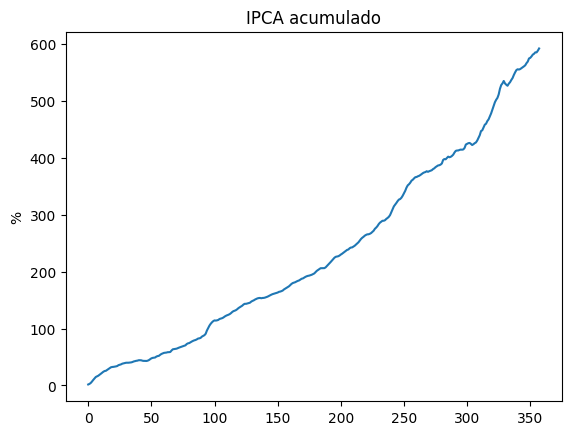

In [52]:
# plotar o gráfico da evolução do IPCA acumulado
df['IPCA_acum'].plot(title='IPCA acumulado', ylabel='%', xlabel='')

In [55]:
# Agregar o IPCA acumulado por ano
ipca_yearly = df.groupby('year')['IPCA_acum'].last().reset_index()

# Visualizar o resultado
print(ipca_yearly)


    year   IPCA_acum
0   1995   22.408880
1   1996   34.115827
2   1997   41.123020
3   1998   43.459515
4   1999   56.284701
5   2000   65.621680
6   2001   78.330267
7   2002  100.675651
8   2003  119.338384
9   2004  136.009515
10  2005  149.437827
11  2006  157.274602
12  2007  168.742181
13  2008  184.604187
14  2009  196.876400
15  2010  214.419029
16  2011  234.866042
17  2012  254.417426
18  2013  275.366396
19  2014  299.418435
20  2015  342.050354
21  2016  369.846724
22  2017  383.694751
23  2018  401.811451
24  2019  423.419653
25  2020  447.064306
26  2021  502.104746
27  2022  536.935554
28  2023  566.369072
29  2024  592.249820


In [56]:
# Calcular o IPCA acumulado por ano (último valor do IPCA acumulado de cada ano)
annual_acum = df.groupby('year')['IPCA_acum'].last()

# Calcular a variação percentual anual
annual_acum_change = annual_acum.pct_change() * 100

In [72]:
annual_acum_change

year
1995          NaN
1996    52.242447
1997    20.539418
1998     5.681721
1999    29.510653
2000    16.588839
2001    19.366446
2002    28.527138
2003    18.537485
2004    13.969629
2005     9.873068
2006     5.244171
2007     7.291437
2008     9.400143
2009     6.647852
2010     8.910479
2011     9.536006
2012     8.324484
2013     8.234094
2014     8.734559
2015    14.238241
2016     8.126397
2017     3.744261
2018     4.721644
2019     5.377697
2020     5.584213
2021    12.311526
2022     6.936961
2023     5.481760
2024     4.569591
Name: IPCA_acum, dtype: float64

In [57]:
# Adicionar a variação anual como uma nova coluna no dataframe original
df = df.merge(annual_acum_change.rename('annual_change'), on='year', how='left')


In [73]:
# Calcular a média geral do aumento anual da inflação
media_geral = df['annual_change'].mean()  # Acessar o valor escalar

# Média desde 2000
media_2000 = df[df['year'] >= 2000]['annual_change'].mean()

# Média desde 2010
media_2010 = df[df['year'] >= 2010]['annual_change'].mean()

# Média desde 2020
media_2020 = df[df['year'] >= 2020]['annual_change'].mean()



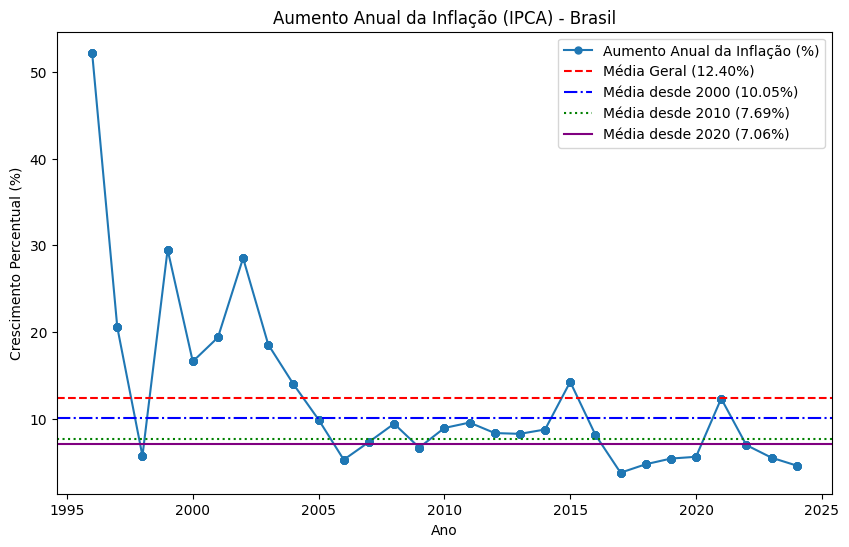

In [75]:
import matplotlib.pyplot as plt
# Plotar o gráfico do aumento anual da inflação
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['annual_change'], label='Aumento Anual da Inflação (%)', marker='o', markersize=5)

# Adicionar linha horizontal com a média geral
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral ({media_geral:.2f}%)')

# Adicionar linha horizontal com a média de 2000 em diante
plt.axhline(y=media_2000, color='blue', linestyle='-.', label=f'Média desde 2000 ({media_2000:.2f}%)')

# Adicionar linha horizontal com a média de 2016 em diante
plt.axhline(y=media_2010, color='green', linestyle=':', label=f'Média desde 2010 ({media_2010:.2f}%)')

# Adicionar linha horizontal com a média de 2020 em diante
plt.axhline(y=media_2020, color='purple', linestyle='-', label=f'Média desde 2020 ({media_2020:.2f}%)')

# Adicionar título e rótulos
plt.title('Aumento Anual da Inflação (IPCA) - Brasil')
plt.xlabel('Ano')
plt.ylabel('Crescimento Percentual (%)')
plt.legend()
plt.grid(False)

# Exibir o gráfico
plt.show()

In [ ]:
# Queremos prever o IPCA acumulado para o ano de 2024



## 